In [1]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 8.3 MB/s 
     |████████████████████████████████| 36.8 MB 35 kB/s 


In [2]:
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptor
- 분자량 등 분자 특성을 보기 위해서 rdkit.Chem의 Descriptor모듈에서 제공

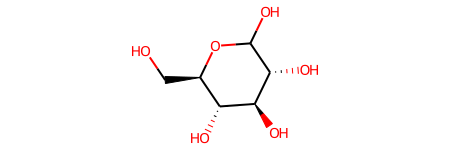

In [6]:
# 포도당 분자 생성
m1 = Chem.MolFromSmiles("OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O")
m1

In [8]:
# 포도당(C6H12O6)의 몰중량=12.01x6+1.01x12+16.00x6=180.16
Descriptors.MolWt(m1)

180.156

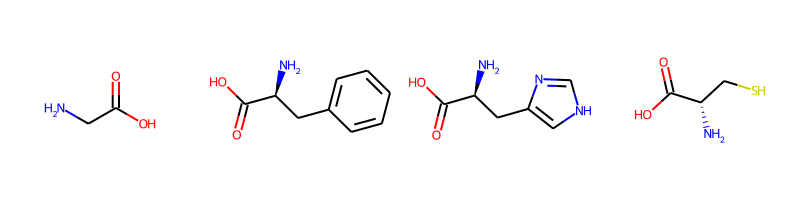

In [9]:
smiles_list = ['C(C(=O)O)N', 'N[C@@H](CC1=CC=CC=C1)C(O)=O', 'O=C([C@H](CC1=CNC=N1)N)O', 'C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

# 특정 패턴이 포함된 여부 찾기

In [15]:
pattern = Chem.MolFromSmiles('CC(N)')
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))
  print(mol.GetSubstructMatches(pattern))


True
((1, 0, 4),)
True
((2, 1, 0), (9, 1, 0))
True
((1, 2, 9), (3, 2, 9))
True
((0, 1, 5), (2, 1, 5))


# ChEMBL DB
- 신약개발을 위한 공개 분자 DB
- 분자의 2D 구조를 제공하고, 측정된 특징들을 제공(logP, MW, Lipinski, etc)

In [17]:
# chembl DB를 가져오기
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 60 kB 7.2 MB/s 
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [19]:
# 웹 기반으로 동작함
from chembl_webresource_client.new_client import new_client

In [20]:
# Coronavirus 검색 후 데이터프레임으로 가져오기
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [30]:
#4번 인덱스에 있는 CHEMBL3927에 관심이 있다고 가정
wanted_target = targets.target_chembl_id[4]
wanted_target

'CHEMBL3927'

In [31]:
activity = new_client.activity
resource = activity.filter(target_chembl_id = wanted_target).filter(standard_type="IC50")
df=pd.DataFrame.from_dict(resource)
df.head(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


In [32]:
# null인 결측 데이터 존재 여부 확인
df.isnull().sum()

activity_comment             133
activity_id                    0
activity_properties            0
assay_chembl_id                0
assay_description              0
assay_type                     0
assay_variant_accession      133
assay_variant_mutation       133
bao_endpoint                   0
bao_format                     0
bao_label                      0
canonical_smiles               0
data_validity_comment         91
data_validity_description     91
document_chembl_id             0
document_journal               0
document_year                  0
ligand_efficiency             42
molecule_chembl_id             0
molecule_pref_name           107
parent_molecule_chembl_id      0
pchembl_value                 42
potential_duplicate            0
qudt_units                     0
record_id                      0
relation                       0
src_id                         0
standard_flag                  0
standard_relation              0
standard_text_value          133
standard_t

In [33]:
#결측치 데이터 "컬럼 삭제", axis=0 행방향, axis=1 열방향
df= df.dropna(axis=1)
df.isnull().sum()

activity_id                  0
activity_properties          0
assay_chembl_id              0
assay_description            0
assay_type                   0
bao_endpoint                 0
bao_format                   0
bao_label                    0
canonical_smiles             0
document_chembl_id           0
document_journal             0
document_year                0
molecule_chembl_id           0
parent_molecule_chembl_id    0
potential_duplicate          0
qudt_units                   0
record_id                    0
relation                     0
src_id                       0
standard_flag                0
standard_relation            0
standard_type                0
standard_units               0
standard_value               0
target_chembl_id             0
target_organism              0
target_pref_name             0
target_tax_id                0
type                         0
uo_units                     0
value                        0
dtype: int64

# Target 변수 범주화하기

In [34]:
# 타겟 변수의 범주화
bioactivity_class = []
for i in df.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [37]:
# activity 특성 추가
df['activity']=bioactivity_class
df.head(3)

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,uo_units,value,activity
0,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,CHEMBL1139624,...,nM,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,7.2,intermediate
1,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,CHEMBL1139624,...,nM,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,9.4,intermediate
2,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,CHEMBL1139624,...,nM,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,13.5,inactive


In [38]:
# 필요한 특성만 추출
df1= df[['molecule_chembl_id','canonical_smiles','standard_value', 'activity']]
df1.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,activity
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive


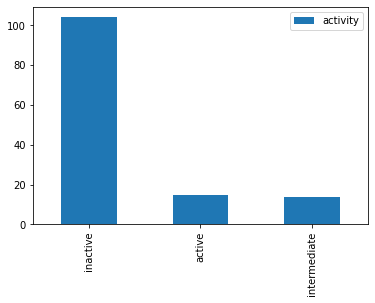

In [43]:
df1.activity.value_counts().to_frame().plot(kind='bar')

# Descriptor(Lipinski)
- 1997년 Pfizer의 과학자 인 Christopher A. Lipinski는 구강복용하는 약물이 상대적으로 크기가 작고 지용성이라는 것을 관찰하여 이 규칙을 고안
- Lipinski's Rule, Rule of five(RO5)라고도 불리는데 Druglikeness를 판단하는데 널리 사용된다
- ADME(pharmacokinetic)에 기반한 프로파일
 - Molecular weight < 500 Dalton
 - Octanol-water partition coefficient (LogP) < 5
 - Hydrogen bond donors < 5
 - Hydrogen bond acceptors < 10

In [39]:
def get_descriptor(smile):
  mol=Chem.MolFromSmiles(smile) 
  
  MolWt = Descriptors.MolWt(mol)
  MolLogP = Descriptors.MolLogP(mol)
  NumHDonors = Lipinski.NumHDonors(mol)
  NumHAcceptors = Lipinski.NumHAcceptors(mol)
      
  return (MolWt, MolLogP, NumHDonors, NumHAcceptors)  

In [40]:
res = df1.canonical_smiles.apply(get_descriptor)

columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
df_add = pd.DataFrame(list(res.values), columns=columnNames)
df2 = pd.concat([df1, df_add], axis=1)
df2.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0,3
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0,5


# Convert IC50 to pIC50
https://ko.wikipedia.org/wiki/IC50

- [IC50](http://www.incodom.kr/IC50)은 inhibitory concentration 50, 저해농도를 뜻한다
 - 특정 생물학적 또는 생화학적 기능을 억제하는 물질의 효과를 측정하는데 사용
 - 즉, A가 주는 반응이 100%라고 가정했을때, B가 이를 50% 억제할 수 있는 B의 농도를 **A반응에 대한 B의 IC50**이라고 한다
 - IC50이 1.4μg/ml라면 어떤 반응을 50% 저해시키는데 필요한 농도는 1.4μg/ml임
- IC50의 로그분포 -log10(IC50)를 **pIC50()**라고 한다
 - `standard_value`에 $10^-9$을 곱하여 nM(10-9승 M이었음)에서 M으로 데이터를 변환한다.
 
 https://www.collaborativedrug.com/ko/why-using-pic50-instead-of-ic50-will-change-your-life/
  - 1 μM의 IC50은 10-6 M이며, 이는 pIC50 = 6.0입니다.
  - 1 nM의 IC50은10-9 M이며, 이는 pIC50 = 9.0입니다.

In [41]:
def get_pIC50(input):
  input = np.float(input)
  if input > 100000000.:
        input = 100000000.
  return -np.log10(input*(10**-9)) # Converts nM to M

In [42]:
df2['pIC50'] = df2.standard_value.apply(get_pIC50)
df2.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4,4.869666


In [44]:
def draw_boxes(x, y, data):
  plt.figure(figsize=(6, 6))
  sns.boxplot(x = x, y = y, data = data)
  plt.xlabel(x, fontsize=14, fontweight='bold')
  plt.ylabel(y, fontsize=14, fontweight='bold')
  plt.show()

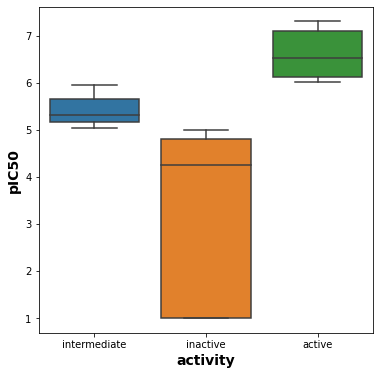

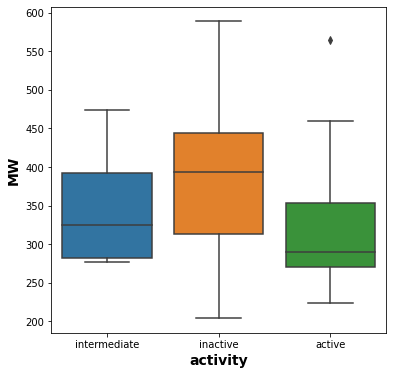

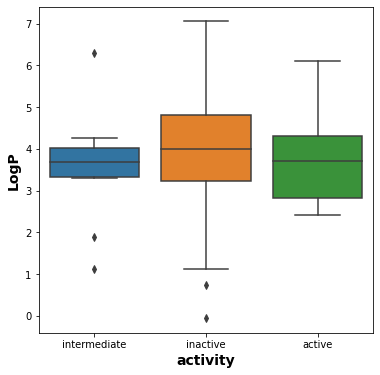

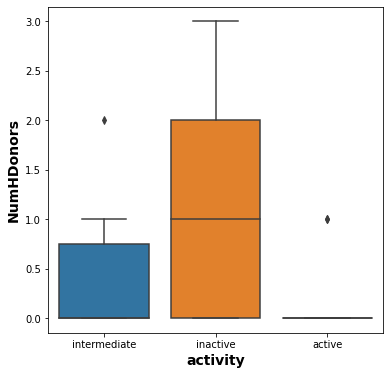

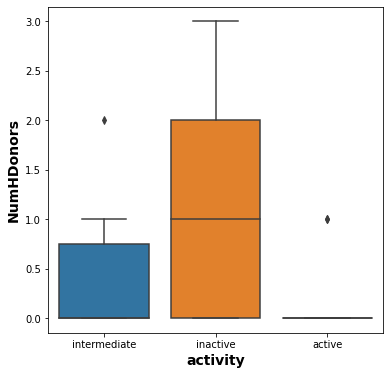

In [46]:
for y in ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHDonors']:
  draw_boxes(x = 'activity', y=y, data = df2)

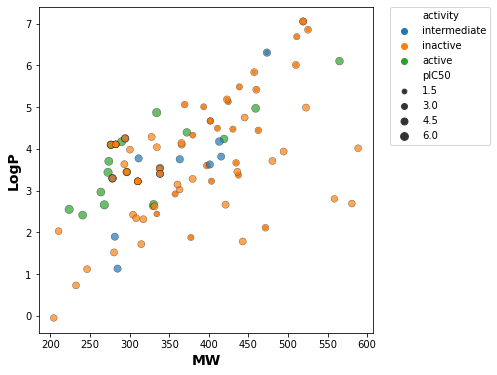

In [47]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x='MW', y='LogP', data=df2, hue='activity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# 데이터 저장하기

In [48]:
df2.to_csv("corona_processed.csv", index=False)

In [49]:
!head -10 corona_processed.csv

molecule_chembl_id,canonical_smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5,5.142667503568732
CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.813200000000002,0,2,5.026872146400302
CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.19000000000005,2.6605000000000008,0,4,4.8696662315049934
CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.34700000000004,3.6308000000000016,0,3,4.8823973083099155
CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.3440000000001,3.5390000000000024,0,5,5.698970004336019
CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,980.0,active,372.24300000000005,4.393300000000003,0,3,6.008773924307505
CHEMBL187598,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21,4820.0,intermediate,311.33700000000005,3.7699000000000016,0,3,5.31695296176115
CHEMBL190743,O=C1